<div style="background-color: #007BFF; height: 4px; width: 100%;"></div>

# **EDA, Data Cleaning and Processing**

The data used in this thesis is taken from the **Substance Use and Risk Factor (SURF)** project led by Dr. Randi Schuster through the
Massachusetts General Hospital Center for Addiction Medicine. The data is collected from 60 middle and high schools in Massachusetts and surveyed annually. The longitudinal dataset created for the RL model uses survey results over a 4 year period from 2020-2023.

TODO:
- Make sure column names are aligned for all 4 years
- Link all 4 years together
- Remove columns that have too much missingness?
    - Decide how to handle nonresponse (impute, remove, flag, etc.)
- Clean categorical and numerical data (scaling, standaridizing, one-hot encoding, etc)
- Examine distribution of key variables
- Use a heatmap to examine correlations between numerical variables
- Analyze relationships between potential predictors (e.g., emotional state, family factors) and the target outcome (suicidal ideation or risk level).
- Analyze how students move between states (e.g., low risk → high risk).
- Calculate transition probabilities for MDP modeling.
- Identify trends in individual responses or risk factors over the 4 years.
- Use line plots or trajectory clustering to visualize these trends.
- Define risk levels
    - Categorize suicide risk: If suicide risk is not directly available, define it based on specific survey items (e.g., responses to questions about depression, loneliness, or past attempts).
    - Balance of risk levels: Check for class imbalance in your defined risk levels. If necessary, plan for techniques like SMOTE or other balancing strategies.
- Demographic breakdown
    - Analyze variables like age, gender, and ethnicity to see how they influence risk.
    - Intersectional analysis: Explore interactions between variables (e.g., family support and peer relationships).
- Temporal analysis
    - Compare yearly survey results to identify overall trends in the population (e.g., an increase in high-risk cases over time).
    - Check for seasonality or systematic changes in response patterns.
- EDA for RL
    - State definition: Visualize and validate the states you'll use in the MDP (e.g., clusters of survey responses).
    - Reward definition: Identify the outcome variables or proxy rewards (e.g., intervention success rates, reduction in risk).
    - Transition probabilities: Calculate and visualize the transition matrix for states to understand the dynamics of student responses.
- Statistical Tests
    - Between-group comparisons: Test for differences in key variables across years or subgroups using t-tests, chi-square tests, or ANOVA.
    - Trend significance: Use regression analysis to test for significant changes over time.
- Visualizations
    - Descriptive visualizations: Bar plots, pie charts, and line graphs to summarize variables.
    - Time-series analysis: Line plots for longitudinal trends in key variables.
    - Cluster analysis: use clustering algorithms (e.g., k-means or DBSCAN) to identify patterns or common trajectories.

In [ ]:
# import matplotlib.pyplot as plt
# df['variable'].hist()
# plt.show()

# import seaborn as sns
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# import numpy as np
# transition_matrix = np.zeros((num_states, num_states))
# # Fill matrix with observed transitions


<div style="background-color: #007BFF; height: 4px; width: 100%;"></div>

## **Libraries and Dependencies**

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import defaultdict

<div style="background-color: #007BFF; height: 4px; width: 100%;"></div>

## **Understanding the Raw Data**

In [2]:
# Read data
surf2020 = pd.read_csv("data/SY2020.csv")
surf2021 = pd.read_csv("data/SY2021.csv")
surf2022 = pd.read_csv("data/SY2022.csv")
surf2023 = pd.read_csv("data/SY2023.csv")

/var/folders/sk/hy6bzzbx4rd98zc284jmxmkm0000gn/T/ipykernel_64392/511838910.py:3: DtypeWarning: Columns (129,130,131) have mixed types. Specify dtype option on import or set low_memory=False.
  surf2021 = pd.read_csv("data/SY2021.csv")
/var/folders/sk/hy6bzzbx4rd98zc284jmxmkm0000gn/T/ipykernel_64392/511838910.py:4: DtypeWarning: Columns (58,87) have mixed types. Specify dtype option on import or set low_memory=False.
  surf2022 = pd.read_csv("data/SY2022.csv")
/var/folders/sk/hy6bzzbx4rd98zc284jmxmkm0000gn/T/ipykernel_64392/511838910.py:5: DtypeWarning: Columns (82,94,96,118,120,121,123,124,126,248) have mixed types. Specify dtype option on import or set low_memory=False.
  surf2023 = pd.read_csv("data/SY2023.csv")


In [3]:
surf = [surf2020, surf2021, surf2022, surf2023]

### **Data Structure**

In [4]:
for i, df in enumerate(surf):
    print(f"SURF {i + 2020}: {len(df)} observations")

SURF 2020: 3497 observations
SURF 2021: 6469 observations
SURF 2022: 29762 observations
SURF 2023: 26160 observations


In [5]:
display(surf2020.head())

,IDX.INT.Origin.Record,IDX.INT.Origin.Database,SSS.INT.School.Code,SSS.CHR.GradesSurveyed,SSS.INT.Fifth.Grade.Enrollment,SSS.INT.Sixth.Grade.Enrollment,SSS.INT.Seventh.Grade.Enrollment,SSS.INT.Eighth.Grade.Enrollment,SSS.INT.Ninth.Grade.Enrollment,SSS.INT.Tenth.Grade.Enrollment,...,INV.LGL.SUB.Alcohol.Life,INV.LGL.SUB.Cannabis.Life,INV.LGL.SUB.Cigarettes.Life,INV.LGL.SUB.Vapes.Life,INV.LGL.SUB.Cigars.Life,INV.LGL.SUB.Smokeless.Life,INV.INT.SUB.Cigars.Past30,INV.INT.SUB.Smokeless.Past30,SSS.DBL.PercentOptOutsbyGrades,SSS.DBL.PercentOptOutsbySchool
0,978,18297,1011,9th - 12th,0,0,0,0,255,259,...,False,False,False,False,False,False,NaN,NaN,1.8,1.8
1,979,18297,1011,9th - 12th,0,0,0,0,255,259,...,True,True,False,True,False,False,NaN,NaN,1.8,1.8
2,980,18297,1011,9th - 12th,0,0,0,0,255,259,...,False,False,False,True,False,False,NaN,NaN,1.8,1.8
3,981,18297,1011,9th - 12th,0,0,0,0,255,259,...,False,False,False,False,False,False,NaN,NaN,1.8,1.8
4,982,18297,1011,9th - 12th,0,0,0,0,255,259,...,False,False,False,False,False,False,NaN,NaN,1.8,1.8


In [6]:
display(surf2021.head())

,IDX.INT.Origin.Record,IDX.INT.Origin.Database,SSS.INT.School.Code,SSS.CHR.GradesSurveyed,SSS.INT.Fifth.Grade.Enrollment,SSS.INT.Sixth.Grade.Enrollment,SSS.INT.Seventh.Grade.Enrollment,SSS.INT.Eighth.Grade.Enrollment,SSS.INT.Ninth.Grade.Enrollment,SSS.INT.Tenth.Grade.Enrollment,...,INV.LGL.SUB.Alcohol.Life,INV.LGL.SUB.Cannabis.Life,INV.LGL.SUB.Cigarettes.Life,INV.LGL.SUB.Vapes.Life,INV.LGL.SUB.Cigars.Life,INV.LGL.SUB.Smokeless.Life,INV.INT.SUB.Cigars.Past30,INV.INT.SUB.Smokeless.Past30,SSS.DBL.PercentOptOutsbyGrades,SSS.DBL.PercentOptOutsbySchool
0,1848,18297,1011.0,9th - 12th,0.0,0.0,0.0,0.0,242.0,260.0,...,False,False,False,False,False,False,NaN,NaN,0.6,0.6
1,1849,18297,1011.0,9th - 12th,0.0,0.0,0.0,0.0,242.0,260.0,...,True,False,False,False,False,False,NaN,NaN,0.6,0.6
2,1850,18297,1011.0,9th - 12th,0.0,0.0,0.0,0.0,242.0,260.0,...,True,True,False,False,False,False,NaN,NaN,0.6,0.6
3,1851,18297,1011.0,9th - 12th,0.0,0.0,0.0,0.0,242.0,260.0,...,False,False,False,False,False,False,NaN,NaN,0.6,0.6
4,1852,18297,1011.0,9th - 12th,0.0,0.0,0.0,0.0,242.0,260.0,...,False,False,False,False,False,False,NaN,NaN,0.6,0.6


In [7]:
display(surf2022.head())

,IDX.INT.Origin.Database,IDX.INT.Origin.Record,IDX.CHR.Matched.ID,DTQ.LGL.Matched.ID,SSS.INT.School.Code,SSS.CHR.GradesSurveyed,SSS.INT.Fifth.Grade.Enrollment,SSS.INT.Sixth.Grade.Enrollment,SSS.INT.Seventh.Grade.Enrollment,SSS.INT.Eighth.Grade.Enrollment,...,INV.INT.IEP.Type.Q6,INV.INT.IEP.Type.Other,SBJ.INT.GenderIdentity.R,SBJ.FCT.GenderId.R,SSS.DBL.PercentOptOutsbyGrades,SSS.DBL.PercentOptOutsbySchool,SBJ.CHR.Weights.Race,SBJ.CHR.Weights.State,SBJ.CHR.Weights.District,SBJ.CHR.Weights.County
0,34085,6,NLN 2022 1,False,1012,9th - 12th,0,0,0,0,...,0,NaN,1.0,Boy/ man/ male,2.8,2.8,Black,1.796980,0.837424,1.095609
1,34085,7,NLN 2022 2,False,1012,9th - 12th,0,0,0,0,...,0,NaN,2.0,Girl/ woman/ female,2.8,2.8,White,0.906533,0.944859,0.884030
2,34085,8,NLN 2022 3,False,1012,9th - 12th,0,0,0,0,...,0,NaN,2.0,Girl/ woman/ female,2.8,2.8,White,0.762428,0.788882,0.705020
3,34085,9,NLN 2022 4,False,1012,9th - 12th,0,0,0,0,...,0,NaN,1.0,Boy/ man/ male,2.8,2.8,White,0.762428,0.788882,0.705020
4,34085,10,NLN 2022 5,False,1012,9th - 12th,0,0,0,0,...,0,NaN,2.0,Girl/ woman/ female,2.8,2.8,White,0.762428,0.788882,0.705020


In [8]:
display(surf2023.head())

,IDX.INT.Origin.Database,IDX.INT.Origin.Record,IDX.CHR.Matched.ID,DTQ.LGL.Matched.ID,SSS.INT.School.Code,SSS.CHR.GradesSurveyed,SSS.INT.Fifth.Grade.Enrollment,SSS.INT.Sixth.Grade.Enrollment,SSS.INT.Seventh.Grade.Enrollment,SSS.INT.Eighth.Grade.Enrollment,...,SBJ.INT.Sexuality.R,SBJ.FCT.Sexuality.R,SBJ.INT.GenderIdentity.R,SBJ.FCT.GenderId.R,SSS.DBL.PercentOptOutsbyGrades,SSS.DBL.PercentOptOutsbySchool,SBJ.CHR.Weights.Race,SBJ.CHR.Weights.State,SBJ.CHR.Weights.District,SBJ.CHR.Weights.County
0,42388,13,YLN 32980,True,1059,9th - 12th,0.0,0,0,0,...,1.0,Straight or heterosexual,1.0,Boy/ man/ male,NaN,NaN,White,0.855346,0.819954,1.159394
1,42388,14,NLN 2023 13,False,1059,9th - 12th,0.0,0,0,0,...,1.0,Straight or heterosexual,1.0,Boy/ man/ male,NaN,NaN,White,0.591419,0.581176,0.841787
2,42388,15,NLN 2023 14,False,1059,9th - 12th,0.0,0,0,0,...,1.0,Straight or heterosexual,1.0,Boy/ man/ male,NaN,NaN,Latin,0.664988,0.819954,3.144507
3,42388,16,YLN 19069,True,1059,9th - 12th,0.0,0,0,0,...,1.0,Straight or heterosexual,1.0,Boy/ man/ male,NaN,NaN,White,0.591419,0.581176,0.841787
4,42388,17,NLN 2023 16,False,1059,9th - 12th,0.0,0,0,0,...,2.0,Gay or Lesbian,8.0,I don't want to say,NaN,NaN,Latin,0.459798,0.581176,2.283094


#### **Missingness**

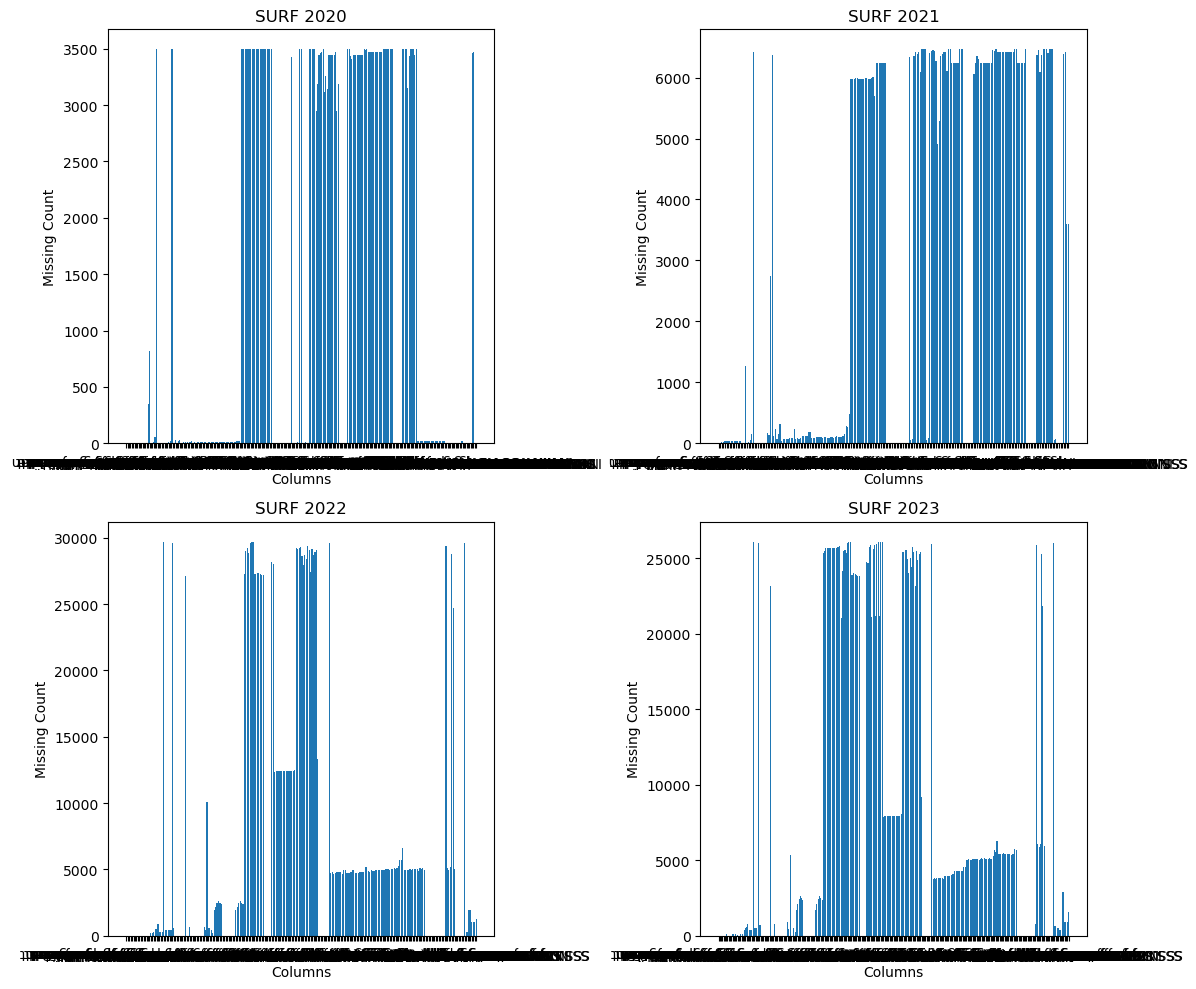

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, df in enumerate(surf):
    missing_counts = df.isnull().sum()
    axes[i].bar(missing_counts.index, missing_counts.values)
    axes[i].set_title(f"SURF {i + 2020}")
    axes[i].set_xlabel("Columns")
    axes[i].set_ylabel("Missing Count")
    axes[i].tick_params(axis='x', rotation=180)

plt.tight_layout()
plt.show()

In [10]:
# Potential missingness cutoffs for each year
cutoff2020 = 900    # 3497
cutoff2021 = 1500   # 6469
cutoff2022 = 8000   # 29762
cutoff2023 = 10000  # 26160

____________

### **Key Variables**

- Identity
    - SBJ.FCT.Sex
    - SBJ.INT.Age
    - SBJ.FCT.GenderId
    - SBJ.FCT.Sexuality
    - SBJ.LGL.Race.White
    - SBJ.LGL.Race.HaitianBlackAfricanAmerican
    - SBJ.LGL.Race.Asian
    - SBJ.LGL.Race.HawaiianPacificIslander
    - SBJ.LGL.Race.AmericanIndianAlaskaNative
    - SBJ.LGL.Race.MiddleEasternNorthAfrican
    - SBJ.LGL.Race.Other
    - SBJ.LGL.Race.Multiple
    - SBJ.LGL.Race
    - SBJ.FCT.Ethnicity
- Substance Use:
    - INV.LGL.SUB.Alcohol.Ever
    - INV.LGL.SUB.Cannabis.Ever
    - INV.LGL.SUB.Vapes.Ever
    - INV.LGL.SUB.Cigarettes.Ever
    - INV.LGL.SUB.Cigarillo.Ever
    - INV.LGL.SUB.Oral.Ever
    - INV.LGL.SUB.Hookah.Ever
    - INV.LGL.SUB.Juul.Ever
    - INV.LGL.SUB.ECig.Ever
    - INV.INT.SUB.Alcohol.LifeF
    - INV.INT.SUB.Cannabis.LifeF
    - INV.INT.SUB.Alcohol.Past30
    - INV.INT.SUB.Cannabis.Past30
    - INV.INT.SUB.Vapes.Past30
    - INV.INT.SUB.Cigarette.Past30
    - INV.INT.SUB.Cigarillo.Past30
    - INV.INT.SUB.Oral.Past30
    - INV.INT.SUB.Hookah.Past30
    - INV.INT.SUB.Juul.Past30
    - INV.INT.SUB.ECig.Past30
    - INV.INT.SUB.TabaccoOther.Past30
    - INV.INT.SUB.Juul.Past30
- Adolescent Psychotic-like Symptoms
    - INV.DBL.APSS.Q1.MindReading
    - INV.DBL.APSS.Q2.TVRadio
    - INV.DBL.APSS.Q3.Spying
    - INV.DBL.APSS.Q4.Auditory
    - INV.DBL.APSS.Q5.Controlled
    - INV.DBL.APSS.Q6.Visual
    - INV.DBL.APSS.Q7.Grandiosity
    - INV.DBL.APSS.Total
- Emotional Reactivity
    - INV.INT.ERS.Q01.Persistence1
    - INV.INT.ERS.Q08.Persistence2
    - INV.INT.ERS.Q10.Persistence3
    - INV.INT.ERS.Q11.Persistence4
    - INV.INT.ERS.PersistenceTotal
    - INV.INT.ERS.Q02.Sensitivity1
    - INV.INT.ERS.Q05.Sensitivity2
    - INV.INT.ERS.Q07.Sensitivity3
    - INV.INT.ERS.Q09.Sensitivity4
    - INV.INT.ERS.Q12.Sensitivity5
    - INV.INT.ERS.Q13.Sensitivity6
    - INV.INT.ERS.Q14.Sensitivity7
    - INV.INT.ERS.Q15.Sensitivity8
    - INV.INT.ERS.Q16.Sensitivity9
    - INV.INT.ERS.Q17.Sensitivity10
    - INV.INT.ERS.SensitivityTotal
    - INV.INT.ERS.Q03.IntensityArousal1
    - INV.INT.ERS.Q04.IntensityArousal2
    - INV.INT.ERS.Q06.IntensityArousal3
    - INV.INT.ERS.Q18.IntensityArousal4
    - INV.INT.ERS.Q19.IntensityArousal5
    - INV.INT.ERS.Q20.IntensityArousal6
    - INV.INT.ERS.Q21.IntensityArousal7
    - INV.INT.ERS.IntensityArousalTotal
    - INV.INT.ERS.Total
- Four-Item Patient Health Questionnaire
    - INV.INT.PHQ4.Q1.Anxious
    - INV.INT.PHQ4.Q2.Worried
    - INV.INT.PHQ4.Q3.Depressed
    - INV.INT.PHQ4.Q4.Anhedonia
    - INV.INT.PHQ4.Depression
    - INV.INT.PHQ4.Anxiety
    - INV.LGL.PHQ4.Anxiety
    - INV.LGL.PHQ4.Depression
    - INV.LGL.PHQ4.AnxOrDep
    - INV.INT.PHQ4.Total
    - INV.FCT.PHQ4.Total
- Help seeking
    - INV.INT.HelpSeeking.Q1
    - INV.INT.HelpSeeking.Q2
    - INV.INT.HelpSeeking.Q3
    - INV.INT.HelpSeeking.Q4
    - INV.INT.HelpSeeking.Q5
    - INV.INT.HelpSeeking.Q6
    - INV.INT.HelpSeeking.Q7
    - INV.INT.HelpSeeking.Q8
    - INV.INT.HelpSeeking.Q9
    - INV.INT.HelpSeeking.Q10
    - INV.INT.HelpSeeking.Q11
    - INV.INT.HelpSeeking.Q12
    - INV.INT.HelpSeeking.Q13
    - INV.INT.HelpSeeking.Q14
- COVID
    - INV.INT.COVID.Coping.Q01
    - INV.INT.COVID.Coping.Q02
    - INV.INT.COVID.Coping.Q03
    - INV.INT.COVID.Coping.Q04
    - INV.INT.COVID.Coping.Q05
    - INV.INT.COVID.Coping.Q06
    - INV.INT.COVID.Coping.Q07
    - INV.INT.COVID.Coping.Q08
    - INV.INT.COVID.Coping.Q09
    - INV.INT.COVID.Coping.Q10
    - INV.INT.COVID.Coping.Q11
    - INV.INT.COVID.Coping.Q12
    - INV.INT.COVID.Coping.Q13
    - INV.INT.COVID.Coping.Q14
    - INV.INT.COVID.Coping.Q15
    - INV.INT.COVID.Coping.Q16
    - INV.INT.COVID.Coping.Q17
    - INV.INT.COVID.Coping.Q18
    - INV.INT.COVID.Coping.Q19
    - INV.INT.COVID.Coping.Q20
    - INV.INT.COVID.Mood
    - INV.LGL.COVID.Mood.Why.RemoteLearning
    - INV.LGL.COVID.Mood.Why.FamilyTime
    - INV.LGL.COVID.Mood.Why.Isolation
    - INV.LGL.COVID.Mood.Why.VirtualConnect
    - INV.LGL.COVID.Mood.Why.EatOrSleep
    - INV.LGL.COVID.Mood.Why.Substance
    - INV.LGL.COVID.Mood.Why.PhysicalActivity
    - INV.LGL.COVID.Mood.Why.ScreenTime
    - INV.LGL.COVID.Mood.Why.FreeTime
    - INV.LGL.COVID.Mood.Why.PersonalLoss
    - INV.LGL.COVID.Mentalhealth.Q1
    - INV.LGL.COVID.Mentalhealth.Q2
    - INV.LGL.COVID.Mentalhealth.Q3

In [64]:
identity = [
    "SBJ.FCT.Sex",
    # "SBJ.INT.Age",
    "SBJ.FCT.GenderId",
    "SBJ.FCT.Sexuality",
    "SBJ.LGL.Race.White",
    "SBJ.LGL.Race.HaitianBlackAfricanAmerican",
    "SBJ.LGL.Race.Asian",
    "SBJ.LGL.Race.HawaiianPacificIslander",
    "SBJ.LGL.Race.AmericanIndianAlaskaNative",
    "SBJ.LGL.Race.MiddleEasternNorthAfrican",
    "SBJ.LGL.Race.Other",
    "SBJ.LGL.Race.Multiple",
    "SBJ.FCT.Race",
    "SBJ.FCT.Ethnicity",
]

substance_use = [
    "INV.LGL.SUB.Alcohol.Life",
    "INV.LGL.SUB.Cannabis.Life",
    "INV.LGL.SUB.Vapes.Life",
    "INV.LGL.SUB.Cigarettes.Life",
    "INV.INT.SUB.Alcohol.Past30",
    "INV.INT.SUB.Cannabis.Past30",
    "INV.INT.SUB.Vapes.Past30",
    "INV.INT.SUB.Cigarettes.Past30",
]

adolescent_psychotic_symptoms = [
    "INV.DBL.APSS.Q1.MindReading",
    "INV.DBL.APSS.Q2.TVRadio",
    "INV.DBL.APSS.Q3.Spying",
    "INV.DBL.APSS.Q4.Auditory",
    "INV.DBL.APSS.Q5.Controlled",
    "INV.DBL.APSS.Q6.Visual",
    "INV.DBL.APSS.Q7.Grandiosity",
    "INV.DBL.APSS.Total",
]

emotional_reactivity = [
    "INV.INT.ERS.Q01.Persistence1",
    "INV.INT.ERS.Q08.Persistence2",
    "INV.INT.ERS.Q10.Persistence3",
    "INV.INT.ERS.Q11.Persistence4",
    "INV.INT.ERS.PersistenceTotal",
    "INV.INT.ERS.Q02.Sensitivity1",
    "INV.INT.ERS.Q05.Sensitivity2",
    "INV.INT.ERS.Q07.Sensitivity3",
    "INV.INT.ERS.Q09.Sensitivity4",
    "INV.INT.ERS.Q12.Sensitivity5",
    "INV.INT.ERS.Q13.Sensitivity6",
    "INV.INT.ERS.Q14.Sensitivity7",
    "INV.INT.ERS.Q15.Sensitivity8",
    "INV.INT.ERS.Q16.Sensitivity9",
    "INV.INT.ERS.Q18.Sensitivity10",
    "INV.INT.ERS.SensitivityTotal",
    "INV.INT.ERS.Q03.IntensityArousal1",
    "INV.INT.ERS.Q04.IntensityArousal2",
    "INV.INT.ERS.Q06.IntensityArousal3",
    "INV.INT.ERS.Q17.IntensityArousal4",
    "INV.INT.ERS.Q19.IntensityArousal5",
    "INV.INT.ERS.Q20.IntensityArousal6",
    "INV.INT.ERS.Q21.IntensityArousal7",
    "INV.INT.ERS.IntensityArousalTotal",
    "INV.INT.ERS.Total",
]

four_item_phq = [
    "INV.INT.PHQ4.Q1.Anxious",
    "INV.INT.PHQ4.Q2.Worried",
    "INV.INT.PHQ4.Q3.Depressed",
    "INV.INT.PHQ4.Q4.Anhedonia",
    "INV.INT.PHQ4.Depression",
    "INV.INT.PHQ4.Anxiety",
    "INV.LGL.PHQ4.Anxiety",
    "INV.LGL.PHQ4.Depression",
    # "INV.LGL.PHQ4.AnxOrDep",
    "INV.INT.PHQ4.Total",
    "INV.FCT.PHQ4.Total",
]

help_seeking = [
    "INV.LGL.HelpSeeking1",
    "INV.LGL.HelpSeeking2",
    "INV.LGL.HelpSeeking3",
    "INV.LGL.HelpSeeking4",
    "INV.LGL.HelpSeeking5",
    "INV.LGL.HelpSeeking6",
    "INV.LGL.HelpSeeking7",
    "INV.LGL.HelpSeeking8",
    "INV.LGL.HelpSeeking9",
    "INV.LGL.HelpSeeking10",
    "INV.LGL.HelpSeeking11",
    "INV.LGL.HelpSeeking12",
    "INV.LGL.HelpSeeking13",
    "INV.LGL.HelpSeeking0",
]

covid = [
    "INV.INT.COVID.Coping.Q01",
    "INV.INT.COVID.Coping.Q02",
    "INV.INT.COVID.Coping.Q03",
    "INV.INT.COVID.Coping.Q04",
    "INV.INT.COVID.Coping.Q05",
    "INV.INT.COVID.Coping.Q06",
    "INV.INT.COVID.Coping.Q07",
    "INV.INT.COVID.Coping.Q08",
    "INV.INT.COVID.Coping.Q09",
    "INV.INT.COVID.Coping.Q10",
    "INV.INT.COVID.Coping.Q11",
    "INV.INT.COVID.Coping.Q12",
    "INV.INT.COVID.Coping.Q13",
    "INV.INT.COVID.Coping.Q14",
    "INV.INT.COVID.Coping.Q15",
    "INV.INT.COVID.Coping.Q16",
    "INV.INT.COVID.Coping.Q17",
    "INV.INT.COVID.Coping.Q18",
    "INV.INT.COVID.Coping.Q19",
    "INV.INT.COVID.Coping.Q20",
    "INV.INT.COVID.Mood",
    "INV.LGL.COVID.Mood.Why.RemoteLearning",
    "INV.LGL.COVID.Mood.Why.FamilyTime",
    "INV.LGL.COVID.Mood.Why.Isolation",
    "INV.LGL.COVID.Mood.Why.VirtualConnect",
    "INV.LGL.COVID.Mood.Why.EatOrSleep",
    "INV.LGL.COVID.Mood.Why.Substance",
    "INV.LGL.COVID.Mood.Why.PhysicalActivity",
    "INV.LGL.COVID.Mood.Why.ScreenTime",
    "INV.LGL.COVID.Mood.Why.FreeTime",
    "INV.LGL.COVID.Mood.Why.PersonalLoss",
    "INV.LGL.COVID.Mentalhealth.Q1",
    "INV.LGL.COVID.Mentalhealth.Q2",
    "INV.LGL.COVID.Mentalhealth.Q3",
]


In [55]:
for col in surf2020.columns:
    print(col)

IDX.INT.Origin.Record
IDX.INT.Origin.Database
SSS.INT.School.Code
SSS.CHR.GradesSurveyed
SSS.INT.Fifth.Grade.Enrollment
SSS.INT.Sixth.Grade.Enrollment
SSS.INT.Seventh.Grade.Enrollment
SSS.INT.Eighth.Grade.Enrollment
SSS.INT.Ninth.Grade.Enrollment
SSS.INT.Tenth.Grade.Enrollment
SSS.INT.Eleventh.Grade.Enrollment
SSS.INT.Twelfth.Grade.Enrollment
SSS.INT.Grade
SSS.INT.Cohort
SSS.INT.Age
SSS.DBL.Completion.SY20.SY21
SSS.DTM.Survey
SSS.DTM.ContactPage
SSS.INT.SurveyYear
SSS.INT.District.Code
SBJ.FCT.Sex
SBJ.FCT.GenderId
SBJ.CHR.Gender.Other
SBJ.LGL.Race.White
SBJ.LGL.Race.HaitianBlackAfricanAmerican
SBJ.LGL.Race.Asian
SBJ.LGL.Race.HawaiianPacificIslander
SBJ.LGL.Race.AmericanIndianAlaskaNative
SBJ.LGL.Race.MiddleEasternNorthAfrican
SBJ.LGL.Race.Other
SBJ.LGL.Race.Multiple
SBJ.FCT.Race
SBJ.FCT.Ethnicity
SBJ.FCT.Sexuality
SBJ.CHR.SexualOrientation.Other
SBJ.FCT.Link.BirthMonth
SBJ.FCT.Link.OlderSiblings
SBJ.FCT.Link.EyeColor
SBJ.FCT.Link.MiddleInitial
SBJ.CHR.Link.Streetname
SBJ.INT.Link.Kinde

In [40]:
cols_2022 = [
    "INV.LGL.SUB.Other.Prescription",
    "INV.LGL.SUB.Other.Hallucinogens",
    "INV.LGL.SUB.Other.Psychedelics",
    "INV.LGL.SUB.Other.Coca",
    "INV.LGL.SUB.Other.Meth",
    "INV.LGL.SUB.Other.Heroin",
    "INV.LGL.SUB.Other.Inhalants",
    "INV.LGL.SUB.Other.Steroids",
    "INV.LGL.SUB.Other.Never",
]

In [44]:
surf2023[cols_2022].isnull().sum()

INV.LGL.SUB.Other.Prescription     0
INV.LGL.SUB.Other.Hallucinogens    0
INV.LGL.SUB.Other.Psychedelics     0
INV.LGL.SUB.Other.Coca             0
INV.LGL.SUB.Other.Meth             0
INV.LGL.SUB.Other.Heroin           0
INV.LGL.SUB.Other.Inhalants        0
INV.LGL.SUB.Other.Steroids         0
INV.LGL.SUB.Other.Never            0
dtype: int64

In [46]:
surf2023[cols_2022].sum()

INV.LGL.SUB.Other.Prescription       761
INV.LGL.SUB.Other.Hallucinogens      390
INV.LGL.SUB.Other.Psychedelics       165
INV.LGL.SUB.Other.Coca               149
INV.LGL.SUB.Other.Meth               130
INV.LGL.SUB.Other.Heroin             122
INV.LGL.SUB.Other.Inhalants          288
INV.LGL.SUB.Other.Steroids           158
INV.LGL.SUB.Other.Never            20106
dtype: int64

In [47]:
# Translations
rename_2020 = {
    "INV.LGL.SUB.Alcohol.Ever": "INV.LGL.SUB.Alcohol.Life",
    "INV.LGL.SUB.Cannabis.Ever": "INV.LGL.SUB.Cannabis.Life",
    "INV.LGL.SUB.Vapes.Ever": "INV.LGL.SUB.Vapes.Life",
    "INV.LGL.SUB.Cigarettes.Ever": "INV.LGL.SUB.Cigarettes.Life",
    "INV.LGL.SUB.Cigarillo.Ever": "INV.LGL.SUB.Cigarillo.Life",
    "INV.LGL.SUB.Oral.Ever": "INV.LGL.SUB.Oral.Life",
}

In [49]:
surf2020 = surf2020.rename(columns=rename_2020)
surf2021 = surf2021.rename(columns=rename_2020)

In [66]:
questions = identity + substance_use + adolescent_psychotic_symptoms + emotional_reactivity + four_item_phq + help_seeking

for q in questions:
    assert q in surf2020.columns, f"{q} 2020"
    assert q in surf2021.columns, f"{q} 2021"
    assert q in surf2022.columns, f"{q} 2022"
    assert q in surf2023.columns, f"{q} 2023"

<div style="background-color: #007BFF; height: 4px; width: 100%;"></div>

## **Linking SURF 2020-2023s**

In this Notebook, we will use the linking questions from the SURF survey to connect students' responses over the 4 year period.

2020/2021 Linking Questions:
- SBJ.FCT.Link.BirthMonth
- SBJ.FCT.Link.OlderSiblings
- SBJ.FCT.Link.EyeColor
- SBJ.FCT.Link.MiddleInitial
- SBJ.CHR.Link.Streetname
- SBJ.INT.Link.KindergartenYearEst

2022/2023 Linking Questions:
- SBJ.FCT.Link.BirthMonth
- SBJ.FCT.Link.Name3rdLetter (additional)
- SBJ.FCT.Link.OlderSiblings
- SBJ.FCT.Link.EyeColor
- SBJ.FCT.Link.MiddleInitial
- SBJ.CHR.Link.Streetname
- SBJ.INT.Link.KindergartenYearEst

________________

### **Linking SURF 2020 and 2021 Responses**

In [11]:
linking_qs = [
    "SBJ.FCT.Link.BirthMonth",
    "SBJ.FCT.Link.OlderSiblings",
    "SBJ.FCT.Link.EyeColor",
    "SBJ.FCT.Link.MiddleInitial",
    "SBJ.CHR.Link.Streetname",
    "SBJ.INT.Link.KindergartenYearEst"
]

In [12]:
print("SURF2020")
print(surf2020[linking_qs].isnull().sum())
print("\nSURF2021")
print(surf2021[linking_qs].isnull().sum())

SURF2020
SBJ.FCT.Link.BirthMonth              2
SBJ.FCT.Link.OlderSiblings          28
SBJ.FCT.Link.EyeColor                5
SBJ.FCT.Link.MiddleInitial          23
SBJ.CHR.Link.Streetname             30
SBJ.INT.Link.KindergartenYearEst     5
dtype: int64

SURF2021
SBJ.FCT.Link.BirthMonth             117
SBJ.FCT.Link.OlderSiblings          237
SBJ.FCT.Link.EyeColor                75
SBJ.FCT.Link.MiddleInitial          150
SBJ.CHR.Link.Streetname             323
SBJ.INT.Link.KindergartenYearEst     31
dtype: int64


In [13]:
surf2020_cleaned = surf2020.dropna(subset=linking_qs)
surf2021_cleaned = surf2021.dropna(subset=linking_qs)

print("SURF2020 Cleaned")
print(surf2020_cleaned[linking_qs].isnull().sum())
print("\nSURF2021 Cleaned")
print(surf2021_cleaned[linking_qs].isnull().sum())

SURF2020 Cleaned
SBJ.FCT.Link.BirthMonth             0
SBJ.FCT.Link.OlderSiblings          0
SBJ.FCT.Link.EyeColor               0
SBJ.FCT.Link.MiddleInitial          0
SBJ.CHR.Link.Streetname             0
SBJ.INT.Link.KindergartenYearEst    0
dtype: int64

SURF2021 Cleaned
SBJ.FCT.Link.BirthMonth             0
SBJ.FCT.Link.OlderSiblings          0
SBJ.FCT.Link.EyeColor               0
SBJ.FCT.Link.MiddleInitial          0
SBJ.CHR.Link.Streetname             0
SBJ.INT.Link.KindergartenYearEst    0
dtype: int64


In [14]:
surf2020_cleaned = surf2020_cleaned.reset_index()
surf2021_cleaned = surf2021_cleaned.reset_index()

____________

#### **Linking Questions**

As shown in the paper *Understanding Adolescent Mental Health Symptom Progression in School-Based Settings: The Substance Use and Risk Factors (SURF) Survey*, allowing one-off errors ("one-missing" subsets) in the set of linking questions led to an substantially improved the true positive rate while only slightly diminishing the true negative rate. Additionally, students were reported to answer the eye color, street name questions, and older sibling question least consistently, and the simulated experiment showed that including a subset of questions leaving off street name and eye color lead to the best balance between the true positive and true negative rate.


In [15]:
# Acceptable linking subsets
link_subsets = [linking_qs] + list(combinations(linking_qs, 5))
link_subsets.append([
    "SBJ.FCT.Link.BirthMonth",
    "SBJ.FCT.Link.OlderSiblings",
    "SBJ.FCT.Link.MiddleInitial",
    "SBJ.INT.Link.KindergartenYearEst"
])
for i in range(len(link_subsets)):
    link_subsets[i] = list(link_subsets[i])

In [16]:
def create_linker(df, linked_subsets):
    """
    Returns a helper function to find the first matching observation in the DataFrame.

    Input:
        df (pd.DataFrame): The DataFrame to search in.
        link_subsets (list of list): List of subsets of column names to check.

    Output:
        function: A helper function that takes `obs` as input and returns the first matching observation.
    """
    
    # For plotting purposes
    matches_counts = defaultdict(int)
    subset_sizes = defaultdict(int)
    gen_counts = defaultdict(int)
    linked_ids = set()
    
    def find_link(obs):
        for i, subset in enumerate(linked_subsets):
            match = df[df[subset].eq(obs[subset]).all(axis=1)]
            if not match.empty:
                matches_counts[len(match)] += 1
                subset_sizes[len(subset)] += 1
                gen_counts[len(match) * 10 + len(subset)] += 1
                for i in range(len(match)):
                    if match.iloc[i]["index"] not in linked_ids:
                        linked_ids.add(match.iloc[i]["index"])
                        return match.iloc[0]["index"]
        return None
    
    return find_link, matches_counts, subset_sizes, gen_counts, linked_ids

In [17]:
find_link, matches_counts, subset_sizes, gen_counts, linked_ids = create_linker(surf2021_cleaned, link_subsets)

# Augment data with link matches
surf2020_cleaned["SBJ.CHR.Matched.ID"] = surf2020_cleaned.apply(find_link, axis=1)
surf2020_cleaned["SBJ.LGL.Matched.ID"] = surf2020_cleaned["SBJ.CHR.Matched.ID"].notnull()

In [18]:
print(matches_counts)
print(subset_sizes)
print(gen_counts)

defaultdict(<class 'int'>, {1: 2557, 2: 210, 3: 100, 4: 44, 7: 14, 5: 14, 8: 5, 6: 9, 9: 2})
defaultdict(<class 'int'>, {6: 1378, 5: 1253, 4: 324})
defaultdict(<class 'int'>, {16: 1358, 15: 1035, 14: 164, 26: 19, 25: 123, 35: 62, 45: 23, 34: 38, 24: 68, 75: 5, 54: 12, 44: 21, 74: 9, 86: 1, 64: 6, 65: 3, 94: 2, 84: 4, 55: 2})


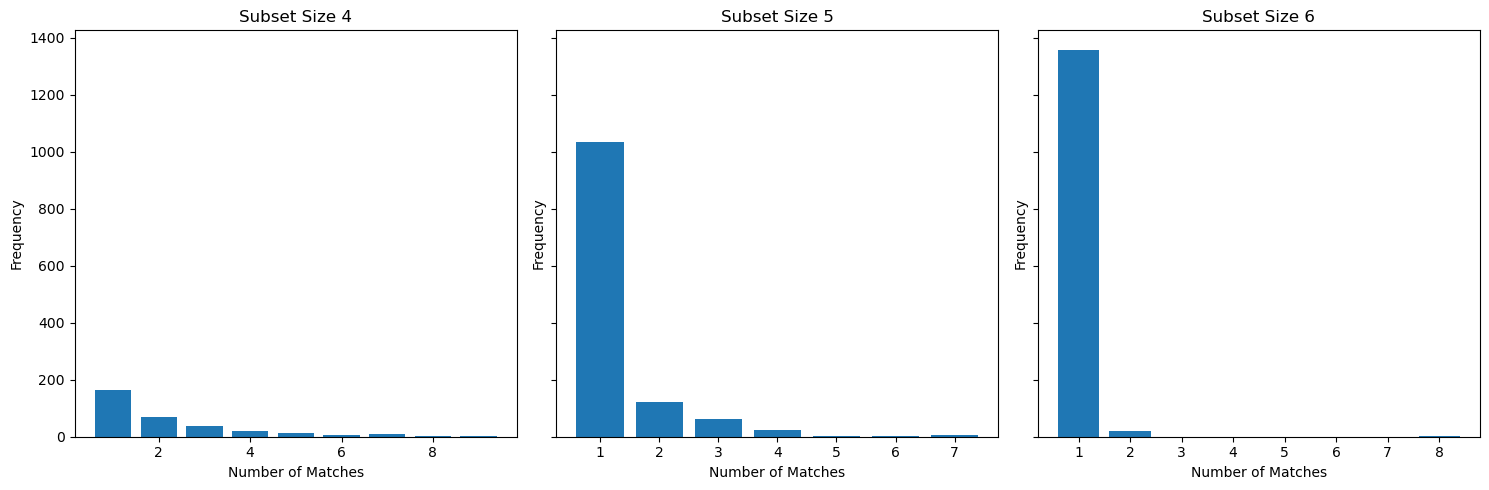

In [19]:
matches = [(key // 10, key % 10, value) for key, value in gen_counts.items()]
subset_sizes = [4, 5, 6]
data_by_subset = {size: [] for size in subset_sizes}

for match_count, subset_size, freq in matches:
    if subset_size in subset_sizes:
        data_by_subset[subset_size].append((match_count, freq))


fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, subset_size in enumerate(subset_sizes):
    ax = axes[i]
    data = data_by_subset[subset_size]
    if data:
        match_counts, frequencies = zip(*data)
        ax.bar(match_counts, frequencies)
        ax.set_title(f"Subset Size {subset_size}")
        ax.set_xlabel("Number of Matches")
        ax.set_ylabel("Frequency")
    else:
        ax.set_title(f"Subset Size {subset_size}")
        ax.set_xlabel("Number of Matches")
        ax.set_ylabel("Frequency")
        ax.text(0.5, 0.5, "No Data", ha='center', va='center', transform=ax.transAxes)

plt.tight_layout()
plt.show()

In [20]:
new_size = surf2020_cleaned["SBJ.LGL.Matched.ID"].sum()
old_size = len(surf2020_cleaned)

print("Total linked:", new_size)
print("Original dataset size:", old_size)
print("Number lost:", old_size - new_size)

Total linked: 2298
Original dataset size: 3430
Number lost: 1132


In [21]:
surf2020_linked = surf2020_cleaned[surf2020_cleaned["SBJ.LGL.Matched.ID"] == True]
surf2021_linked = surf2021_cleaned[surf2021_cleaned["index"].isin(linked_ids)]

assert(len(surf2021_linked) == new_size)
print("Successful link!")

Successful link!


<div style="background-color: #007BFF; height: 4px; width: 100%;"></div>

**Data Processing**

The goal is to combine these into one dataframe